# Lab 4.01 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 1 - soft-drinks


The file softdrinks.xlsx categorizes 250 randomly 
selected consumers on the basis of their gender, their 
age, and their preference for our brand or a competitor's brand of a low-calorie soft drink. Use a chi-square test for independence to see whether the drink 
preference is independent of gender, and then whether 
it is independent of age.  First make a plot

Results of the main calculations:
- age vs preference
  - χ² ≈ 3.8589  
  - p-value = 0.2771
  - We do not reject H0


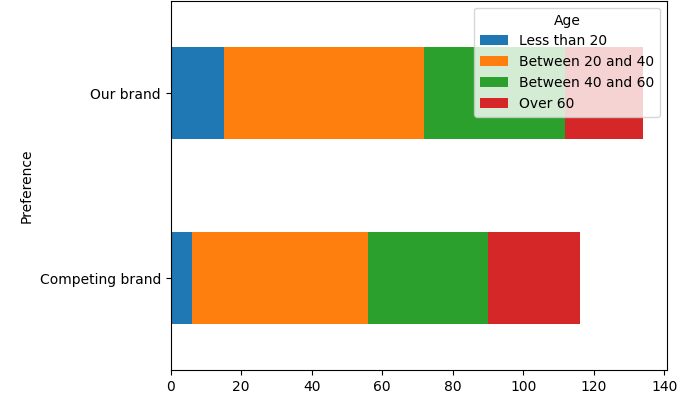



- gender vs preference
  - χ² ≈ 1.4078 
  - p-value = 0.2354
  - We do not reject H0

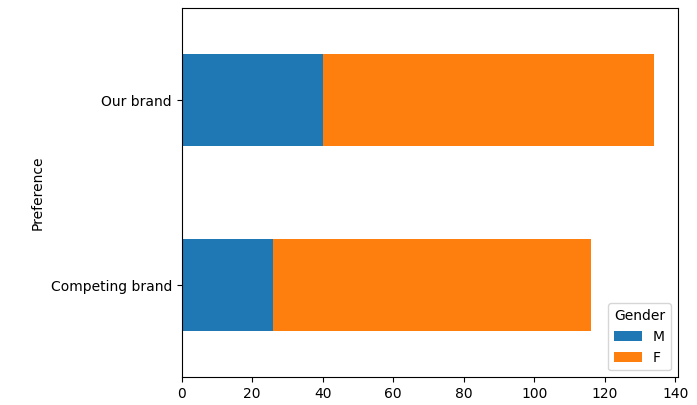

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Softdrinks.csv', sep=";").set_index('Consumer')
df.head()


,Gender,Age,Preference
Consumer,,,
1,F,Over 60,Our brand
2,F,Between 40 and 60,Our brand
3,M,Between 40 and 60,Our brand
4,F,Over 60,Competing brand
5,M,Between 20 and 40,Our brand


### Age vs Brand

In [35]:
# 'int' object has no attribute 'Age'
# Convert 'Age' to a categorical variable
age_categories = CategoricalDtype(categories=['Over 60' 'Between 40 and 60' 'Between 20 and 40' 'Less than 20'], ordered=True)

age_brand = pd.crosstab(df.Age, df.Preference)
age_brand

Preference,Competing brand,Our brand
Age,,
Between 20 and 40,50,57
Between 40 and 60,34,40
Less than 20,6,15
Over 60,26,22


(<Figure size 640x480 with 3 Axes>,
 {('Over 60', 'Our brand'): (0.0,
   0.0,
   0.18916256157635467,
   0.4568106312292358),
  ('Over 60', 'Competing brand'): (0.0,
   0.46013289036544847,
   0.18916256157635467,
   0.5398671096345515),
  ('Between 40 and 60', 'Our brand'): (0.1940886699507389,
   0.0,
   0.29162561576354673,
   0.5387447247912364),
  ('Between 40 and 60', 'Competing brand'): (0.1940886699507389,
   0.542066983927449,
   0.29162561576354673,
   0.4579330160725509),
  ('Between 20 and 40', 'Our brand'): (0.4906403940886699,
   0.0,
   0.42167487684729066,
   0.5309404787779053),
  ('Between 20 and 40', 'Competing brand'): (0.4906403940886699,
   0.5342627379141179,
   0.42167487684729066,
   0.46573726208588195),
  ('Less than 20', 'Our brand'): (0.9172413793103448,
   0.0,
   0.08275862068965513,
   0.7119126720455624),
  ('Less than 20', 'Competing brand'): (0.9172413793103448,
   0.715234931181775,
   0.08275862068965513,
   0.28476506881822494)})

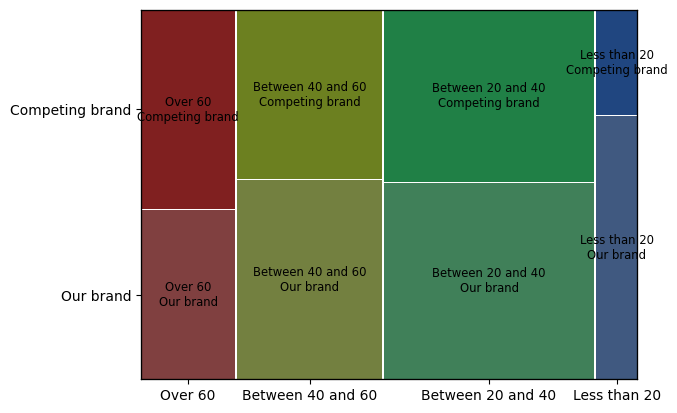

In [38]:
mosaic(data=df, index=['Age','Preference'])


In [39]:
row_sums = age_brand.sum(axis=1)
col_sums = age_brand.sum()
n = row_sums.sum()
expected = np.outer(row_sums, col_sums) / n
expected    

array([[49.648, 57.352],
       [34.336, 39.664],
       [ 9.744, 11.256],
       [22.272, 25.728]])

In [41]:
diffs = (expected - age_brand)**2/expected
print(diffs)


Preference         Competing brand  Our brand
Age                                          
Between 20 and 40         0.002496   0.002160
Between 40 and 60         0.003288   0.002846
Less than 20              1.438581   1.245339
Over 60                   0.624011   0.540189


In [42]:
chi_squared = diffs.values.sum()
chi_squared

3.8589111978459556

In [44]:
dof = min(gender_brand.shape)-1
cramers_v = np.sqrt(chi_squared / (dof*n))
print(cramers_v)

0.12424027040933154


In [45]:
chi2, p, df, expected = stats.chi2_contingency(age_brand)
chi2, p, df 

(3.8589111978459556, 0.277107731429235, 3)

### Gender vs Brand

In [12]:
gender_brand = pd.crosstab(df.Preference, df.Gender)
gender_brand

Gender,F,M
Preference,,
Competing brand,90,26
Our brand,94,40


(<Figure size 640x480 with 3 Axes>,
 {('F', 'Our brand'): (0.0, 0.0, 0.7323383084577115, 0.5091723241369349),
  ('F', 'Competing brand'): (0.0,
   0.5124945832731475,
   0.7323383084577115,
   0.48750541672685244),
  ('M', 'Our brand'): (0.737313432835821,
   0.0,
   0.26268656716417915,
   0.6040471156750227),
  ('M', 'Competing brand'): (0.737313432835821,
   0.6073693748112352,
   0.26268656716417915,
   0.3926306251887647)})

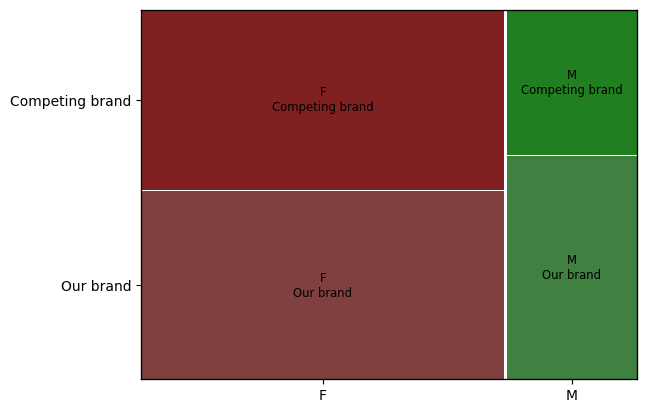

In [13]:
mosaic(data=df, index=['Gender','Preference'])

In [17]:
row_sums = gender_brand.sum(axis=1)
col_sums = gender_brand.sum()
n = row_sums.sum()
expected = np.outer(row_sums, col_sums) / n
expected    

array([[85.376, 30.624],
       [98.624, 35.376]])

In [18]:
diffs = (expected - gender_brand)**2/expected
print(diffs)


Gender                  F         M
Preference                         
Competing brand  0.250438  0.698190
Our brand        0.216797  0.604403


In [19]:
chi_squared = diffs.values.sum()
chi_squared

1.7698282812460793

In [20]:
dof = min(gender_brand.shape)-1
cramers_v = np.sqrt(chi_squared / (dof*n))
print(cramers_v)

0.0841386541667046


In [25]:
chi2, p, df, expected = stats.chi2_contingency(gender_brand)
chi2, p, df 

(1.4077735237706785, 0.23542635283778704, 1)